## 1.(a)答案：

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# 价格、重量原始数据
price = np.array([5.89, 49.59, 59.98, 159, 17.99, 56.99, 82.75, 142.19, 31, 125.5,
         4.5, 22, 52.9, 61, 33.5, 328, 128, 142.19, 229, 189.4])

weight = np.array([1.4, 1.5, 2.2, 2.7, 3.2, 3.9, 4.1, 4.1, 4.6, 4.8,
          4.9, 5.3, 5.5, 5.8, 6.2, 8.9, 11.6, 18, 22.9, 38.2])
# 四分位数定义
quartile = np.array([25, 50, 75])



# 计算价格、重量的四分位数
price_q1, price_median, price_q3 = np.percentile(price, quartile)
weight_q1, weight_median, weight_q3 = np.percentile(weight, quartile)

print("price的四分位数 Q1, MEDIAN, Q3 =", price_q1, price_median, price_q3)
print("weight的四分位数 Q1, MEDIAN, Q3 =", weight_q1, weight_median, weight_q3)

price的四分位数 Q1, MEDIAN, Q3 = 32.875 60.489999999999995 142.19
weight的四分位数 Q1, MEDIAN, Q3 = 3.7249999999999996 4.85 6.875


## 1.（b)答案：

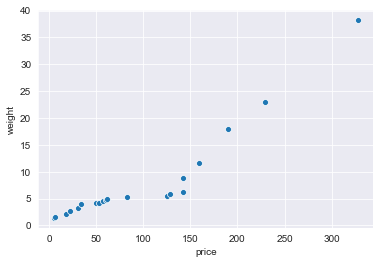

In [3]:
# 排序数据
data = np.column_stack((sorted(price), sorted(weight)))
df = pd.DataFrame(data, columns=["price", "weight"])

# 绘制Q-Q图
sns.set_style("darkgrid")
sns.scatterplot(x="price", y="weight", data=df, sizes=80)

## 1.(c)答案：

In [5]:
p_min, p_max = min(price), max(price)
w_min, w_max = min(weight), max(weight)
new_min, new_max = 1, 10

price_normalized = [(n - p_min)/(p_max - p_min)*(new_max - new_min) + new_min for n in price]
weight_normalized = [(n - w_min)/(w_max - w_min)*(new_max - new_min) + new_min for n in weight]

print("规范化price：", price_normalized)
print()
print("规范化weight：", weight_normalized)

规范化price： [1.0386707882534776, 2.2544358578052552, 2.5434930448222564, 5.298299845440495, 1.3753013910355487, 2.4603091190108195, 3.1769706336939723, 4.83063369397218, 1.7372488408037094, 4.366306027820711, 1.0, 1.4868624420401855, 2.3465224111282845, 2.5718701700154556, 1.8068006182380216, 10.0, 4.435857805255023, 4.83063369397218, 7.245749613601237, 6.144049459041732]

规范化weight： [1.0, 1.0244565217391304, 1.1956521739130435, 1.3179347826086958, 1.440217391304348, 1.6114130434782608, 1.6603260869565215, 1.6603260869565215, 1.7826086956521738, 1.8315217391304346, 1.8559782608695654, 1.953804347826087, 2.0027173913043477, 2.0760869565217392, 2.1739130434782608, 2.8342391304347823, 3.4945652173913038, 5.059782608695652, 6.258152173913043, 10.0]


## 1.(d)答案

In [5]:
from scipy.stats import pearsonr

print("pearson互相关系数计算一：", pearsonr(price, weight)[0])

pearson互相关系数计算一： 0.5363070272140884


In [6]:
print("pearson互相关系数计算二：", np.corrcoef(price, weight)[0, 1])

pearson互相关系数计算二： 0.5363070272140884


## 2.(a)答案

从小到大排序

欧式距离：x1, x4, x3, x5, x2;

曼哈顿距离：x1, x4, x3, x5, x2;

上确界距离：x1, x4, x3, x5, x2;

余弦相似度：x1, x3, x4, x2, x5;


In [7]:
# 第二题

x = np.array([1.4, 1.6])
dataset = np.array([[1.5, 1.7],
           [2, 1.9],
           [1.6, 1.8],
           [1.2, 1.5],
           [1.5, 1.0]])


# 各数据点欧式距离
euc_dist = [np.linalg.norm(x-data) for data in dataset]
print("各数据点欧式距离:", euc_dist)

# 各数据点曼哈顿距离
man_dist = [np.linalg.norm(x-data, ord=1) for data in dataset]
print("各数据点曼哈顿距离:", man_dist)  

# 各数据点上确界距离
sup_dist = [np.linalg.norm(x-data, ord=np.inf) for data in dataset]
print("各数据点上确界距离:", sup_dist)  

# 各数据点上的余弦相似度
cos_dist = [float(np.dot(x, data))/(np.linalg.norm(x)*np.linalg.norm(data)) for data in dataset]
print("各数据点余弦相似度:", cos_dist)


各数据点欧式距离: [0.14142135623730948, 0.6708203932499369, 0.28284271247461906, 0.22360679774997896, 0.608276253029822]
各数据点曼哈顿距离: [0.19999999999999996, 0.8999999999999999, 0.40000000000000013, 0.30000000000000004, 0.7000000000000002]
各数据点上确界距离: [0.10000000000000009, 0.6000000000000001, 0.20000000000000018, 0.19999999999999996, 0.6000000000000001]
各数据点余弦相似度: [0.999991391443956, 0.9957522612528874, 0.9999694838187877, 0.9990282349375618, 0.9653633930282662]


## 2.(b)答案

欧式距离：x1, x3, x4, x2, x5

In [11]:
from sklearn import preprocessing


x_normalized = preprocessing.normalize([[1.4, 1.6]], norm="l2")
dataset_normalized = preprocessing.normalize(dataset, norm="l2")

print("归一化数据点x：", x_normalized)
print()
print("归一化数据集x1, x2, x3, x4, x5：", dataset_normalized, sep='\n')
print()

# 各数据点欧式距离
euc_dist = [np.linalg.norm(x_normalized[0]-data) for data in dataset_normalized]
print("各数据点欧式距离:", euc_dist)

归一化数据点x： [[0.65850461 0.75257669]]

归一化数据集x1, x2, x3, x4, x5：
[[0.66162164 0.74983786]
 [0.72499943 0.68874946]
 [0.66436384 0.74740932]
 [0.62469505 0.78086881]
 [0.83205029 0.5547002 ]]

各数据点欧式距离: [0.004149350803200864, 0.09217091457843411, 0.007812321193114019, 0.044085486555962686, 0.2631980507972417]
